In [ ]:
# 피쳐 엔지니어링 - 피쳐 선택(다중 공선성 제거), 피쳐 추출(PCA, BGM) > 설명 수정

In [1]:
# 한글, 음수 시각화 설정

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

import warnings
warnings.filterwarnings('ignore')

# 분류 모델

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
RD_sample_df = pd.read_csv('../data/RD_sample_df.csv', index_col= 0)
# RD_sample_df.info()

RD_sample_df = RD_sample_df.sample(frac= 1, random_state= 42).reset_index(drop= True)
RD_sample_df[:10]

,X1WOS45106_PV,X1WOS45109_PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,...,S_AB9_AB10_L_L,S_C2_C3_U_R,투입.LEFT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,폐기율...,bgm_feature_0,bgm_feature_1,bgm_feature_2,RD_defect
0,1.0,1.0,0.450450,0.961538,1.000000,0.777778,0.923077,1.0,0.0,0.919031,...,0.888684,0.204014,0.747967,0.076961,0.111226,0.205093,1.000000e+00,4.562500e-186,2.131444e-201,1
1,1.0,1.0,0.720721,0.346154,1.000000,0.777778,0.923077,1.0,0.0,0.922491,...,0.873742,0.146110,0.723577,0.095310,0.000000,0.157387,5.722998e-28,1.000000e+00,1.203463e-124,1
2,1.0,1.0,0.900901,0.384615,1.000000,0.777778,0.923077,1.0,1.0,0.868512,...,0.822628,0.245788,0.731707,0.000000,0.000000,0.046350,1.000000e+00,8.307997e-103,0.000000e+00,0
3,1.0,1.0,0.900901,0.346154,1.000000,0.777778,0.923077,1.0,0.4,0.913495,...,0.854184,0.148869,0.796748,0.039221,0.000000,0.105098,4.240556e-18,1.000000e+00,7.114828e-190,0
4,1.0,1.0,0.000000,0.269231,0.555556,1.000000,0.076923,1.0,0.2,0.942561,...,0.536411,0.519947,0.504065,0.019803,0.137201,0.087902,2.612868e-251,0.000000e+00,1.000000e+00,0
5,1.0,1.0,1.000000,1.000000,1.000000,0.888889,0.769231,1.0,1.0,0.874740,...,0.710712,0.236884,0.869919,0.148420,0.057158,0.169172,1.000000e+00,0.000000e+00,0.000000e+00,1
6,1.0,1.0,0.279279,0.961538,1.000000,0.777778,0.923077,1.0,0.0,0.885121,...,0.843167,0.141105,0.821138,0.039221,0.028988,0.064621,1.000000e+00,1.124569e-225,3.485523e-311,0
7,1.0,1.0,0.891892,0.346154,1.000000,0.777778,0.923077,1.0,0.0,0.921799,...,0.824362,0.381384,0.886179,0.076961,0.000000,0.084116,3.916714e-42,1.000000e+00,8.401803e-168,1
8,1.0,1.0,0.450450,0.346154,1.000000,0.777778,0.923077,1.0,0.2,0.907266,...,0.883299,0.152626,0.723577,0.095310,0.028988,0.095429,1.000000e+00,1.205280e-92,8.467151e-174,1
9,1.0,1.0,0.270270,0.961538,1.000000,0.777778,0.923077,1.0,0.2,0.887889,...,0.670973,0.132099,0.382114,0.262364,0.111226,0.434237,1.000000e+00,3.763979e-285,7.492617e-159,1


In [5]:
X = RD_sample_df.iloc[:, :-1]
y= RD_sample_df['RD_defect']

X.shape

(2094, 97)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train.shape

(1675, 97)

In [ ]:
# 분류 모델

# 로지스틱 회귀
# 트리 기반 모델 : RandomForest, CatBoost
# 딥러닝 : 간단한 MLP

# 평가 지표
# ROC-AUC, Precision-Recall Curve, F1 Score 등

# Recall: 실제 불량 데이터 중 모델이 불량으로 예측한 비율

# 선형 모델

## 1. 로지스틱 회귀

# 트리 기반 모델

## 1. 랜덤포레스트

In [7]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators= 100, random_state= 42)
rf_clf.fit(X_train, y_train)

rf_importances = rf_clf.feature_importances_

rf_importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : rf_importances
})

# rf_importance_df.info()
rf_importance_df[:5]
rf_importance_df.sort_values(by= 'importance', ascending= False)[:10]['feature'].values

array(['ROLLDOWN.폐기.LEFT.', '폐기율...', 'ROOF.HEATING.Zone.1.1JIC31101.PV',
       'TMP.TIN..BAY.1.LEFT.1TI30201.PV', 'S_C2_C3_U_R',
       'ROOF.HEATING.Zone57.1JIC31157.PV', '투입.LEFT.',
       'ATM.N2.H2.5..함유율.1CLFI33402_CPV', 'N2.TO.EA1313B.1FI33527A_PV',
       'SPOUT.LEFT.TOP.1FI33514.PV'], dtype=object)

- 하이퍼 파라미터 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [50, 100, 300],
    'max_depth' : [8, 10, 12]
}


estimator = RandomForestClassifier(random_state= 42)
grid_cv = GridSearchCV(estimator= estimator, param_grid= params, cv= 3)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [10]:
from sklearn.metrics import recall_score

best_rd_clf = grid_cv.best_estimator_
best_rd_clf.fit(X_train, y_train)

rd_preds = best_rd_clf.predict(X_test)

print('test 재현율 :', recall_score(y_test, rd_preds)) # 96.4%

test 재현율 : 0.9637305699481865


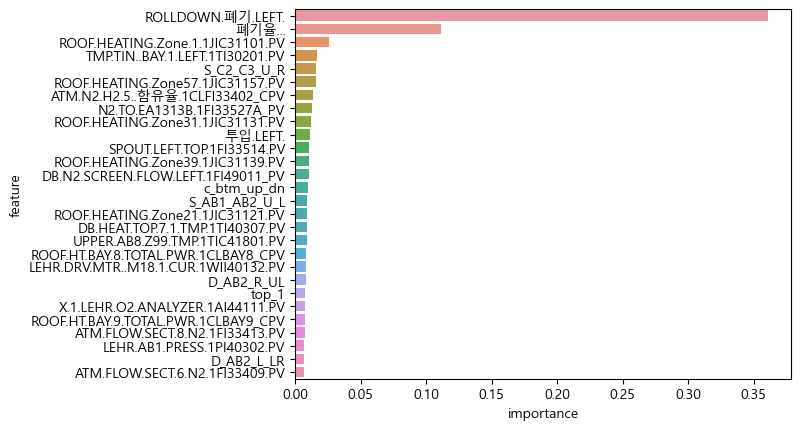

In [11]:
# 상위 28개의 피쳐 - PCA로 90%의 데이터 설명 가능
import seaborn as sns

feat_importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : best_rd_clf.feature_importances_
})

feat_importance_28 = feat_importance_df.sort_values(by= 'importance', ascending= False)[:28]
# print(feat_importance_28)

sns.barplot(x= feat_importance_28['importance'],
            y= feat_importance_28['feature'])
plt.show()

## 2. XG Boosting

In [21]:
import xgboost as xgb

train_set = xgb.DMatrix(data= X_train, label= y_train)
test_set = xgb.DMatrix(data= X_test, label= y_test)

# 하이퍼 파라미터 생성
# objective에 이진 분류인지 멀티 클래스 분류인지 설정
params = {'max_depth' : 5, 'eta' : 0.1, # eta는 학습률
          'objective' : 'binary:logistic', 'eval_matric' : 'logloss'}
# 예측 횟수
num_rounds = 700

# 일반 그라디언트 부스팅은 예측기의 개수를 설정하면 조기종료하지 않고고무조건 예측기 개수만큼 훈련
wlist= [(train_set, 'train'), (test_set, 'test')]
xgb_model = xgb.train(params= params, dtrain= train_set, num_boost_round= num_rounds, 
                      evals= wlist, early_stopping_rounds= 100)




# max_depth= 5, eta= 0.1 : [262]	train-logloss:0.00169	test-logloss:0.01852
# max_depth= 5, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 7, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 10, eta= 0.01 : [699]	train-logloss:0.00312	test-logloss:0.01905
# max_depth= 10, eta= 0.1 : [263]	train-logloss:0.00169	test-logloss:0.01852
# max_depth= 3, eta= 0.1 : [280]	train-logloss:0.00190	test-logloss:0.01944


[0]	train-logloss:0.59950	test-logloss:0.60187
[1]	train-logloss:0.52274	test-logloss:0.52550
[2]	train-logloss:0.45858	test-logloss:0.46170
[3]	train-logloss:0.40425	test-logloss:0.40770
[4]	train-logloss:0.35777	test-logloss:0.36152
[5]	train-logloss:0.31767	test-logloss:0.32171
[6]	train-logloss:0.28285	test-logloss:0.28717
[7]	train-logloss:0.25245	test-logloss:0.25703
[8]	train-logloss:0.22578	test-logloss:0.23062
[9]	train-logloss:0.20230	test-logloss:0.20739
[10]	train-logloss:0.18155	test-logloss:0.18688
[11]	train-logloss:0.16316	test-logloss:0.16873
[12]	train-logloss:0.14683	test-logloss:0.15264
[13]	train-logloss:0.13229	test-logloss:0.13833
[14]	train-logloss:0.11932	test-logloss:0.12550
[15]	train-logloss:0.10773	test-logloss:0.11406
[16]	train-logloss:0.09736	test-logloss:0.10386
[17]	train-logloss:0.08807	test-logloss:0.09474
[18]	train-logloss:0.07974	test-logloss:0.08665
[19]	train-logloss:0.07226	test-logloss:0.07934
[20]	train-logloss:0.06553	test-logloss:0.07280
[2

In [22]:
from sklearn.metrics import recall_score

xgb_preds= xgb_model.predict(test_set)
print(np.round(xgb_preds[:10], 3)) # 1로 판정할 확률을 리턴함

xgb_preds = [1 if pred > 0.1 else 0 for pred in xgb_preds]
print(xgb_preds[:10])

print('재현율 :', recall_score(y_test, xgb_preds))

[0.051 1.    0.    0.999 0.    0.999 0.    0.    0.    0.   ]
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
재현율 : 1.0


In [26]:
# 1.0????
# 한 번 다른 샘플 데이터로도 확인

random_sample_df = pd.read_csv('../data/RD_total_df.csv', index_col= 0)
random_sample_df.shape # (8143, 98)

random_sample_df = random_sample_df.sample(frac= 0.1, weights= 'RD_defect', random_state= 42)


## 3. MLP

In [ ]:
# 딥러닝 모델은 기본적으로 블랙박스 - shap를 활용하여 feature importance 파악악